In [1]:
! pip install --upgrade  ktrain
     

In [2]:
!pip install pandas
!pip install numpy
!pip install tensorflow

In [3]:
import pandas as pd 
import numpy as np 
import os 

C:\Users\dell\AppData\Local\Temp\ipykernel_46256\2688358416.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df_sarcastic=pd.read_csv('D:/Downloads1/archive/Sarcasm_Hindi_Tweets-SARCASTIC.csv'
)

In [6]:
df_sarcastic['Label']="Sarcastic"

In [7]:
df_sarcastic=df_sarcastic[["text","Label"]]

In [8]:
df_sarcastic

,text,Label
0,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
1,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
2,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
3,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
4,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
...,...,...
6046,Sone Ki Chain Important Nhi Hoti\nBalki\nChain...,Sarcastic
6047,@IACAbhi @myvivek1989 kya baat kr rhe ho..\n\n...,Sarcastic
6048,Corona se Bachne Ke Liye Ghar par rahe\n.\n.\n...,Sarcastic
6049,Me : kisi ne bataya tum kitni khubsurat ho?\n\...,Sarcastic


In [10]:
df_nonsarcastic=pd.read_csv('D:/Downloads1/archive/Sarcasm_Hindi_Tweets-NON-SARCASTIC.csv')

In [11]:
df_nonsarcastic['Label']="Non-Sarcastic"

In [12]:
df_nonsarcastic=df_nonsarcastic[["text","Label"]]

In [13]:
df_nonsarcastic

,text,Label
0,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...,Non-Sarcastic
1,"डिप्रेशन के शुरुआती आठ लक्षण, उदाहरण और इलाज\n...",Non-Sarcastic
2,@FaiziJee98 Aaj apki saalgirah hy nahi 🙊😛 or j...,Non-Sarcastic
3,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...,Non-Sarcastic
4,#Happy rathyatra https://t.co/flLVnffvOJ,Non-Sarcastic
...,...,...
10123,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोर...,Non-Sarcastic
10124,बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लग...,Non-Sarcastic
10125,#SushantSinghRajput #Suicide क्यों?? चमक धमक ...,Non-Sarcastic
10126,हर हाल में #खुश रहना सीख लो🙃\n उस दिल क...,Non-Sarcastic


In [14]:
import re
english_pattern = re.compile(r'[a-zA-Z]+')
hindi_range = r'\u0900-\u097F'

# Clean Hindi tweets
def clean_hindi(tweet):
    cleaned_tweet = ""
    for word in tweet.split():
        if english_pattern.match(word):
            cleaned_tweet += word + " "
        else:
            cleaned_word = re.sub(r'[^'+hindi_range+'\s]', '', word)
            cleaned_tweet += cleaned_word + " "
    return cleaned_tweet

In [15]:
df_sarcastic['text'] = df_sarcastic['text'].apply(clean_hindi)
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(clean_hindi)

In [16]:
# Remove URLs
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove usernames or mentions
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'@[^\s]+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove hashtags
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'#\w+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

In [17]:
df_sarcastic['text'] = df_sarcastic['text'].str.lower()
df_nonsarcastic['text'] = df_nonsarcastic['text'].str.lower()

In [18]:
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'\d+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [19]:
import regex

def remove_emojis(text):
    # Remove emojis using regular expression
    cleaned_text = regex.sub(r'\p{So}', '', text)
    return cleaned_text

In [20]:
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: remove_emojis(x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: remove_emojis(x))

In [21]:
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')

In [22]:
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(url_pattern, '', x))
df_sarcastic['cleaned_text'] = df_sarcastic['text'].apply(lambda x: re.sub(email_pattern, '', x))

In [23]:
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(url_pattern, '', x))
df_nonsarcastic['cleaned_text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(email_pattern, '', x))

In [24]:
import string
df_sarcastic['cleaned_text'] = df_sarcastic['cleaned_text'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))

In [25]:
df_nonsarcastic['cleaned_text'] = df_nonsarcastic['cleaned_text'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))

In [27]:
pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 262.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.5 MB 655.4 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.5 MB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 2.3 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 2.3 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.5 MB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.3/1.5 MB 2.7 MB/s eta 0:00:01
   -------------------------------------- - 1.5/1.5 MB 2.7 MB/s eta 0:00:01
   --------------------------

In [28]:
import nltk
from nltk.corpus import stopwords

In [29]:
nltk.download('stopwords')
nltk.download('punkt')

stopwords_english = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [33]:
stopwords_hindi = [
    "अंदर", "अत", "अपना", "अपनी", "अपने", "अभी", "आदि", "आप", "इत्यादि", "इन", 
    "इनका", "इन्हीं", "इन्हें", "इन्होंने", "इस", "इसका", "इसकी", "इसके", "इसमें", 
    "इसी", "इसे", "उन", "उनका", "उनकी", "उनके", "उनको", "उन्हीं", "उन्हें", "उन्होंने", 
    "उस", "उसके", "उसी", "उसे", "एक", "एवं", "एस", "ऐसे", "और", "कर", 
    "करता", "करते", "करना", "करने", "करें", "कहते", "कहा", "का", "काफ़ी", "कि", 
    "कितना", "किन्हें", "किन्हों", "किया", "किर", "किस", "किसी", "किसे", "की", "कुछ", 
    "कुल", "के", "को", "कोई", "कौन", "कौनसा", "गया", "घर", "जब", "जहाँ", 
    "जा", "जितना", "जिधर", "जिन", "जिन्हें", "जिन्हों", "जिस", "जिसे", "जीतने", "जीतो", 
    "तक", "तब", "तरह", "तिन्हें", "तिन्हों", "तिस", "तिसे", "तो", "तोह", "था", 
    "थी", "थे", "दबारा", "दिया", "दुसरे", "देखा", "देखो", "दो", "द्वारा", "न", 
    "नहीं", "ना", "निचे", "निहायत", "नीचे", "ने", "पर", "पहले", "पुरा", "पूरा", 
    "पे", "फिर", "बनी", "बही", "बहुत", "बाद", "बाला", "बिलकुल", "भी", "भीतर", 
    "मगर", "मानो", "मे", "में", "यदि", "यह", "यहाँ", "यही", "या", "यिह", 
    "ये", "रखें", "रवासा", "रहा", "रहे", "ऱ्वासा", "लिए", "लिये", "लेकिन", "व", 
    "वगेरह", "वर्ग", "वह", "वहाँ", "वहीं", "वाले", "वुह", "वे", "वग़ैरह", "संग", 
    "सकता", "सकते", "सबसे", "सभी", "साथ", "साबुत", "साभ", "सारा", "से", "सो", 
    "ही", "हुआ", "हुई", "हुए", "है", "हैं", "हो", "होता", "होती", "होते", "होना", 
    "होने"
]

In [34]:

df_sarcastic['cleaned_text'] = df_sarcastic['cleaned_text'].apply(lambda x: ' '.join(word for word in nltk.word_tokenize(x) if word.lower() not in stopwords_english and word.lower() not in stopwords_hindi))

In [35]:
df_nonsarcastic['cleaned_text'] = df_nonsarcastic['cleaned_text'].apply(lambda x: ' '.join(word for word in nltk.word_tokenize(x) if word.lower() not in stopwords_english and word.lower() not in stopwords_hindi))

In [36]:
df_nonsarcastic=df_nonsarcastic.loc[:6050]

In [37]:
data = pd.concat([df_sarcastic, df_nonsarcastic], axis=0)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['Label'], random_state=50)

In [39]:
import tensorflow as tf 

import ktrain
from ktrain import text
t = text.Transformer("monsoon-nlp/hindi-bert", maxlen=500, class_names=list(set(y_train.values)))

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Python310\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dell\.cache\huggingface\hub\models--monsoon-nlp--hindi-bert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs

In [40]:
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())

preprocessing train...
language: hi
train sequence lengths:
	mean : 21
	95percentile : 32
	99percentile : 35


c:\Python310\lib\site-packages\ktrain\utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False


In [41]:
evalr = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())

preprocessing test...
language: hi
test sequence lengths:
	mean : 21
	95percentile : 32
	99percentile : 35


In [42]:

model = t.get_classifier()

In [43]:

learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)

In [44]:

learner.lr_find(show_plot=True, max_epochs=10)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
 568/1512 [==========>...................] - ETA: 1:04:35 - loss: 0.6913 - accuracy: 0.5449

In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
1513/1513 [==============================] - 297s 184ms/step - loss: 0.2700 - accuracy: 0.8779 - val_loss: 0.1332 - val_accuracy: 0.9323
Epoch 2/3
1513/1513 [==============================] - 277s 183ms/step - loss: 0.1005 - accuracy: 0.9541 - val_loss: 0.0332 - val_accuracy: 0.9874
Epoch 3/3
1513/1513 [==============================] - 274s 181ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0114 - val_accuracy: 0.9967


In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1.2e-4, 5)



begin training using onecycle policy with max lr of 0.00012...
Epoch 1/5
1513/1513 [==============================] - 297s 184ms/step - loss: 0.2498 - accuracy: 0.9014 - val_loss: 0.0620 - val_accuracy: 0.9868
Epoch 2/5
1513/1513 [==============================] - 273s 180ms/step - loss: 0.0649 - accuracy: 0.9803 - val_loss: 0.0092 - val_accuracy: 0.9980
Epoch 3/5
1513/1513 [==============================] - 279s 184ms/step - loss: 0.0404 - accuracy: 0.9869 - val_loss: 0.0088 - val_accuracy: 0.9980
Epoch 4/5
1513/1513 [==============================] - 278s 184ms/step - loss: 0.0112 - accuracy: 0.9968 - val_loss: 2.1338e-04 - val_accuracy: 1.0000
Epoch 5/5
1513/1513 [==============================] - 278s 184ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 9.0797e-05 - val_accuracy: 1.0000


In [48]:
learner.save_model("D:/Downloads1/archive/new_model.h5")


In [49]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [50]:
import random
list_of_num=[]
for i in range(15):
  x = random.randint(1,100)
  list_of_num.append(x)

In [51]:
list_of_num

[45, 50, 97, 32, 33, 71, 59, 54, 9, 70, 94, 75, 24, 60, 10]

In [52]:
for i in list_of_num:
  print('Actual Text = ', X_test.iloc[i])
  print('\n')
  print("+"*50)
  print("Predicted Label = ",predictor.predict(X_test.iloc[i]))
  print('Actual Label = ',y_test.iloc[i])
  print("-"*50)

Actual Text =  सुकून कमाना अब ग़ालिब नाम ओर शोहरत मोत मिल जाती क़िताबऐजिंदगी


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Non-Sarcastic
Actual Label =  Non-Sarcastic
--------------------------------------------------
Actual Text =  agar tumhe aisa lage ki tumse dur jaa rahe hai ” gaand pe laat marke bhgao ”


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Sarcastic
Actual Label =  Sarcastic
--------------------------------------------------
Actual Text =  अगर आपके छल उससे दुखी चाहिऐ क्यूंकि उससे आपको सबक मिलता रहने लायक छोङने लायक शुभरात्रि मनकीबात


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Non-Sarcastic
Actual Label =  Non-Sarcastic
--------------------------------------------------
Actual Text =  राजस्थान शेरनीराजस्थान विश्वविद्यालय आन बान शान वर्तमान छात्र संघ अध्यक्ष बहिन पूजावर्मा जन्मदिन हार्दिक बधाई शुभकामनाएं। पूजा वर्मा rajasthan university


++++++++++++++++++++++++++++++++++++++++++++++++++
Predic

In [54]:
learner.view_top_losses(n=4)

95/95 [==============================] - 104s 1s/step


TypeError: 'CategoricalCrossentropy' object is not subscriptable

In [ ]:
learner.top_losses(n=4)

95/95 [==============================] - 8s 79ms/step


[]

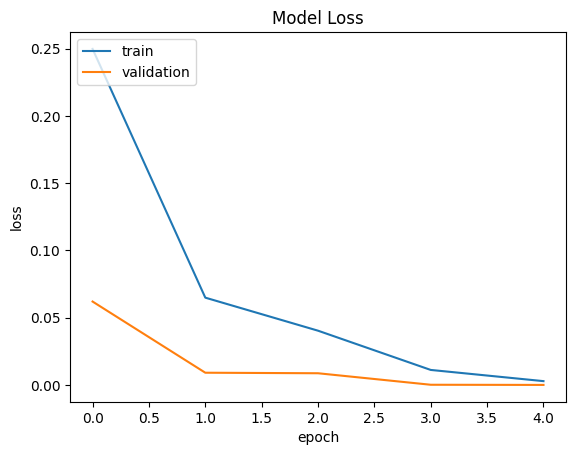

In [ ]:
learner.plot()

In [ ]:
learner.print_layers()

0 (trainable=True) : <transformers.models.electra.modeling_tf_electra.TFElectraMainLayer object at 0x7f07d7e9ad10>
1 (trainable=True) : <transformers.models.electra.modeling_tf_electra.TFElectraClassificationHead object at 0x7f0854612920>


In [ ]:
 from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
len(X_test)

3026

In [ ]:
y_pred=[]
for i in range(len(X_test)):
  k=predictor.predict(X_test.iloc[i])
  y_pred.append(k)


In [ ]:
y_pred=predictor.predict(X_test.iloc[2])

In [ ]:
y_pred

'Non-Sarcastic'

In [ ]:
y_pred

['Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarc

In [ ]:
y_test

5525        Sarcastic
948         Sarcastic
3553    Non-Sarcastic
3687        Sarcastic
3500    Non-Sarcastic
            ...      
5996        Sarcastic
2715        Sarcastic
674     Non-Sarcastic
5925    Non-Sarcastic
2625        Sarcastic
Name: Label, Length: 3026, dtype: object

In [ ]:
y_pred = pd.Series(y_pred)

In [ ]:
y_pred

0           Sarcastic
1           Sarcastic
2       Non-Sarcastic
3           Sarcastic
4       Non-Sarcastic
            ...      
3021        Sarcastic
3022        Sarcastic
3023    Non-Sarcastic
3024    Non-Sarcastic
3025        Sarcastic
Length: 3026, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
label_encoder2 = LabelEncoder()
y_pred = label_encoder2.fit_transform(y_pred)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1514

    accuracy                           1.00      3026
   macro avg       1.00      1.00      1.00      3026
weighted avg       1.00      1.00      1.00      3026



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

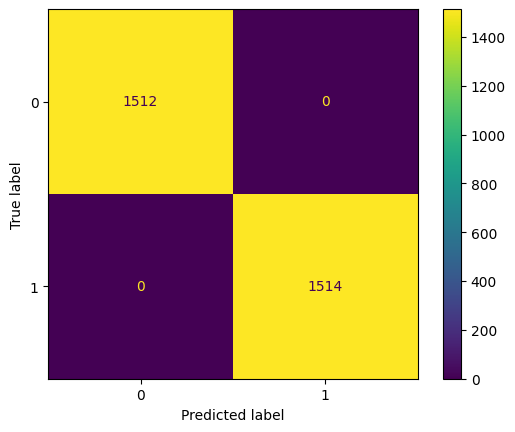

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()

